In [7]:
import pandas as pd
import os
import json
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.figure_factory as ff
import numpy as np


# Результаты валидации - определение оптимальных коэффициентов

In [3]:
d_res = {}
for dir_conv in [x for x in os.listdir() if 'Induced' in x]:
    with open(dir_conv +'/' + '_max_bayes_' + dir_conv + '.json', 'r') as file:
        d_res[dir_conv] = json.load(file)
res = pd.DataFrame(d_res)
res = res.transpose()
res.head()

,target,params
Mesenchymal_Stem_Cells_Induced_Neurons,0.0124215,"{'coeff_betweenness': 9.05548029490298, 'coeff..."
Fibroblasts_Induced_Cardiomyocytes,0.0217863,"{'coeff_betweenness': 9.84984928534643, 'coeff..."
Fibroblasts_Induced_Neurons,0.000814014,"{'coeff_betweenness': 9.555430604302718, 'coef..."
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.00130541,"{'coeff_betweenness': 8.735716100983531, 'coef..."
Fibroblasts_Induced_Neural_Stem_Cells,0.0468907,"{'coeff_betweenness': 9.84984928534643, 'coeff..."


In [6]:
for coeff in list(res.iloc[0,1].keys()):
    res[coeff] = [None] * res.shape[0]
for conv in list(res.index):
    d = res.loc[conv, 'params']
    for coeff in list(d.keys()):
        if coeff != 'target':
            res.loc[conv, coeff] = float('{:.4f}'.format(d[coeff]))
res.columns = ['diff_mean'] + list(res.columns[1:])
for conv in list(res.index):
    res.loc[conv, 'diff_mean'] = float('{:.4f}'.format(float(res.loc[conv,'diff_mean'])))
                                       
res.head(10)

,diff_mean,params,coeff_betweenness,coeff_closeness,coeff_eigentrust,coeff_eigenvector,coeff_katz,coeff_logFC,coeff_pagerank
Mesenchymal_Stem_Cells_Induced_Neurons,0.0124,"{'coeff_betweenness': 9.05548029490298, 'coeff...",9.0555,8.3232,9.1446,9.6125,9.8218,9.867,7.4246
Fibroblasts_Induced_Cardiomyocytes,0.0218,"{'coeff_betweenness': 9.84984928534643, 'coeff...",9.8498,4.6486,9.4933,9.5533,9.7345,1.0621,9.4915
Fibroblasts_Induced_Neurons,0.0008,"{'coeff_betweenness': 9.555430604302718, 'coef...",9.5554,1.2659,1.7143,1.8562,9.7244,1.0863,1.8574
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0013,"{'coeff_betweenness': 8.735716100983531, 'coef...",8.7357,1.6625,9.9294,9.8643,9.3573,1.2376,1.2547
Fibroblasts_Induced_Neural_Stem_Cells,0.0469,"{'coeff_betweenness': 9.84984928534643, 'coeff...",9.8498,4.6486,9.4933,9.5533,9.7345,1.0621,9.4915
Fibroblasts_Induced_Pancreatic_Beta_Cells,0.0084,"{'coeff_betweenness': 9.598467585547837, 'coef...",9.5985,9.6596,9.2349,1.2538,9.53,1.4785,7.2369


In [20]:
dict_multiplication_optimal_factor = {}
res.loc['optimal coefficients', :] = [None] * res.shape[1]
for i in range(2, res.shape[1]):
    res.iloc[6, i] = float('{:.4f}'.format(np.mean(res.iloc[:6, i])))
    metric = list(res.columns)[i][6:]
    dict_multiplication_optimal_factor[metric] = res.iloc[6, i]
print(dict_multiplication_optimal_factor )
with open('dict_multiplication_optimal_factor.json', 'w') as file:
    json.dump(dict_multiplication_optimal_factor, file)
res.head(10)

{'betweenness': 9.4408, 'closeness': 5.0347, 'eigentrust': 8.1683, 'eigenvector': 6.9489, 'katz': 9.6504, 'logFC': 2.6323, 'pagerank': 6.1261}


,diff_mean,params,coeff_betweenness,coeff_closeness,coeff_eigentrust,coeff_eigenvector,coeff_katz,coeff_logFC,coeff_pagerank
Mesenchymal_Stem_Cells_Induced_Neurons,0.0124,"{'coeff_betweenness': 9.05548029490298, 'coeff...",9.0555,8.3232,9.1446,9.6125,9.8218,9.867,7.4246
Fibroblasts_Induced_Cardiomyocytes,0.0218,"{'coeff_betweenness': 9.84984928534643, 'coeff...",9.8498,4.6486,9.4933,9.5533,9.7345,1.0621,9.4915
Fibroblasts_Induced_Neurons,0.0008,"{'coeff_betweenness': 9.555430604302718, 'coef...",9.5554,1.2659,1.7143,1.8562,9.7244,1.0863,1.8574
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0013,"{'coeff_betweenness': 8.735716100983531, 'coef...",8.7357,1.6625,9.9294,9.8643,9.3573,1.2376,1.2547
Fibroblasts_Induced_Neural_Stem_Cells,0.0469,"{'coeff_betweenness': 9.84984928534643, 'coeff...",9.8498,4.6486,9.4933,9.5533,9.7345,1.0621,9.4915
Fibroblasts_Induced_Pancreatic_Beta_Cells,0.0084,"{'coeff_betweenness': 9.598467585547837, 'coef...",9.5985,9.6596,9.2349,1.2538,9.53,1.4785,7.2369
optimal coefficients,None,None,9.4408,5.0347,8.1683,6.9489,9.6504,2.6323,6.1261


In [21]:
res_sh = res.drop('params', axis = 1)
res_sh['p_value'] = ['5.215e-42', '0.0', '0.000232', '1.194e-25', '0.0', '1.448e-20', None] 
res_sh = res_sh[['diff_mean', 'p_value'] + list(res_sh.columns)[1:-2]]
res_sh_1 = res_sh[list(res_sh.columns)[1:]]
res_sh.head(10)

,diff_mean,p_value,coeff_betweenness,coeff_closeness,coeff_eigentrust,coeff_eigenvector,coeff_katz,coeff_logFC
Mesenchymal_Stem_Cells_Induced_Neurons,0.0124,5.215e-42,9.0555,8.3232,9.1446,9.6125,9.8218,9.867
Fibroblasts_Induced_Cardiomyocytes,0.0218,0.0,9.8498,4.6486,9.4933,9.5533,9.7345,1.0621
Fibroblasts_Induced_Neurons,0.0008,0.000232,9.5554,1.2659,1.7143,1.8562,9.7244,1.0863
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0013,1.194e-25,8.7357,1.6625,9.9294,9.8643,9.3573,1.2376
Fibroblasts_Induced_Neural_Stem_Cells,0.0469,0.0,9.8498,4.6486,9.4933,9.5533,9.7345,1.0621
Fibroblasts_Induced_Pancreatic_Beta_Cells,0.0084,1.448e-20,9.5985,9.6596,9.2349,1.2538,9.53,1.4785
optimal coefficients,None,None,9.4408,5.0347,8.1683,6.9489,9.6504,2.6323


In [24]:
fig = ff.create_table(res_sh, index=True)
fig.update_layout(
autosize=False,
width=2500,
height=200,
)
fig.show()

In [25]:
fig = ff.create_table(res_sh)
fig.update_layout(
autosize=False,
width=900,
height=200,
)
fig.show()

# Результаты валидации на оптимальных коэффициентах

In [26]:
d_opt = {'diff_mean' : {}, 'p_value' : {}}
for dir_conv in [x for x in os.listdir() if 'Induced' in x]:
    print(dir_conv)
    with open(dir_conv +'/Validation_results_' + dir_conv + '/total_results_' + dir_conv + '_optim_coeff/' +\
                'dict_results_cosine_dict_' + dir_conv + '_.json', 'r') as file:
        d = json.load(file)
        d_opt['diff_mean'][dir_conv] = float('{:.4f}'.format(d["difference of averag\u0443"]))
        d_opt['p_value'][dir_conv] = d["average pvalue"]

Mesenchymal_Stem_Cells_Induced_Neurons
Fibroblasts_Induced_Cardiomyocytes
Fibroblasts_Induced_Neurons
Fibroblasts_Induced_Pluripotent_Stem_Cells
Fibroblasts_Induced_Neural_Stem_Cells
Fibroblasts_Induced_Pancreatic_Beta_Cells


In [27]:
df_opt = pd.DataFrame(d_opt)
df_opt.head(10)

,diff_mean,p_value
Mesenchymal_Stem_Cells_Induced_Neurons,0.0066,4.846969e-41
Fibroblasts_Induced_Cardiomyocytes,0.0200,0.000000e+00
Fibroblasts_Induced_Neurons,0.0110,4.117995e-22
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0025,3.306225e-35
Fibroblasts_Induced_Neural_Stem_Cells,0.0424,0.000000e+00
Fibroblasts_Induced_Pancreatic_Beta_Cells,0.0068,1.198074e-08


In [28]:
df_opt.loc['Fibroblasts_Induced_Cardiomyocytes','p_value'] = str(0)
df_opt.loc['Fibroblasts_Induced_Neural_Stem_Cells','p_value'] = str(0)
df_opt.head(10)

,diff_mean,p_value
Mesenchymal_Stem_Cells_Induced_Neurons,0.0066,4.84697e-41
Fibroblasts_Induced_Cardiomyocytes,0.0200,0
Fibroblasts_Induced_Neurons,0.0110,4.11799e-22
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0025,3.30622e-35
Fibroblasts_Induced_Neural_Stem_Cells,0.0424,0
Fibroblasts_Induced_Pancreatic_Beta_Cells,0.0068,1.19807e-08


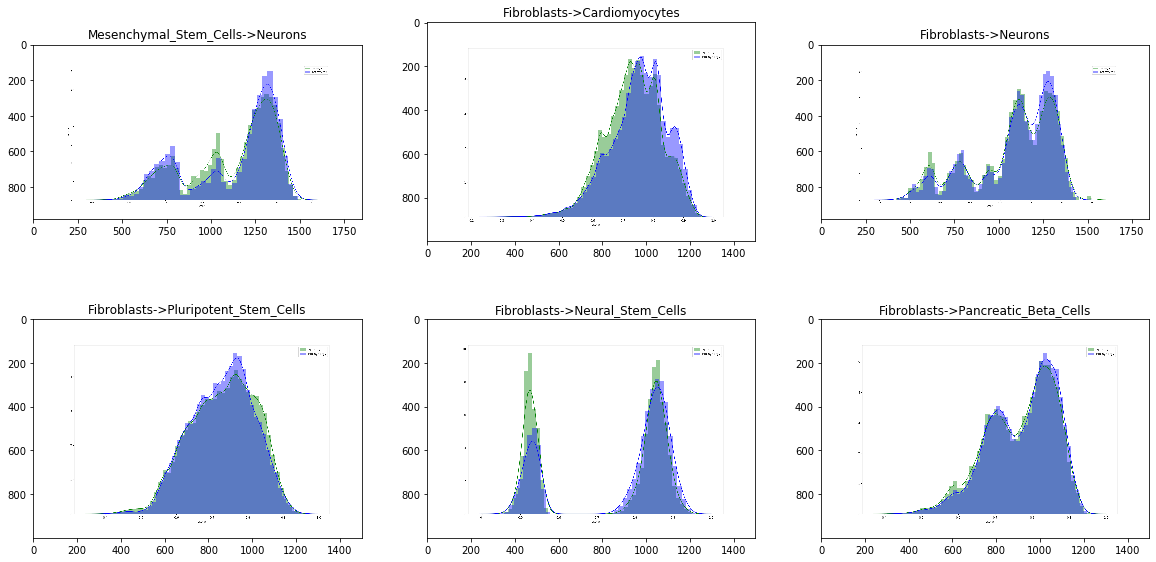

In [30]:
fig, axes = plt.subplots(2,3)
for (dir_conv, i) in zip([x for x in os.listdir() if 'Induced' in x], range(6)):
     
    img = mpimg.imread(dir_conv +'/Validation_results_' + dir_conv + '/total_results_' + dir_conv + '_optim_coeff/' +\
                  'fig_cosine_dict_' + dir_conv + '.png')
    nrow = i//3
    ncol = i % 3
    title = '->'.join(dir_conv.split('_Induced_'))
    axes[nrow, ncol].set_title(title)
    axes[nrow, ncol].imshow(img)
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(10) 
plt.show()

In [32]:
df_opt['diff_mean_max'] = [None] * df_opt.shape[0]
for conv in df_opt.index:
    df_opt.loc[conv, 'diff_mean_max'] = res_sh.loc[conv, 'diff_mean']
df_opt['diff_mean_max - diff_mean'] = df_opt['diff_mean_max'] - df_opt['diff_mean']
df_opt[' diff_mean / diff_mean_max'] = df_opt['diff_mean'] / (df_opt['diff_mean_max'])
for i in range(df_opt.shape[0]):
    df_opt.iloc[i,4] = float('{:.4f}'.format(df_opt.iloc[i,4]))
    df_opt.iloc[i,3] = float('{:.4f}'.format(df_opt.iloc[i,3]))
df_opt.head()

,diff_mean,p_value,diff_mean_max,diff_mean_max - diff_mean,diff_mean / diff_mean_max
Mesenchymal_Stem_Cells_Induced_Neurons,0.0066,4.84697e-41,0.0124,0.0058,0.5323
Fibroblasts_Induced_Cardiomyocytes,0.0200,0,0.0218,0.0018,0.9174
Fibroblasts_Induced_Neurons,0.0110,4.11799e-22,0.0008,-0.0102,13.75
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0025,3.30622e-35,-0.0013,0.0012,1.9231
Fibroblasts_Induced_Neural_Stem_Cells,0.0424,0,0.0469,0.0045,0.9041


In [33]:
fig = ff.create_table(df_opt)
fig.update_layout(
autosize=False,
width=900,
height=200,
)
fig.show()

In [36]:
fig = ff.create_table(df_opt, index = True)
fig.update_layout(
autosize=False,
width=1000,
height=200,
)
fig.show()

# Результаты валидации на оптимальных коэффициентах с подсчетом количества синергетических пар в top 50

In [60]:
d_opt_top50 = {'diff_mean' : {}, 'p_value' : {}, 'count_synergy_pair_in_top50': {}}
for dir_conv in [x for x in os.listdir() if 'Induced' in x]:
    if 'total_results_' + dir_conv + '_opt_coeff_top50' in os.listdir(dir_conv +'/Validation_results_' + dir_conv):
        with open(dir_conv +'/Validation_results_' + dir_conv + '/total_results_' + dir_conv + \
                  '_opt_coeff_top50/' +'dict_results_cosine_dist_' + dir_conv + '_.json', 'r') as file:
            d = json.load(file)
            d_opt_top50['diff_mean'][dir_conv] = float('{:.4f}'.format(d["difference of averag\u0443"]))
            d_opt_top50['p_value'][dir_conv] = d["average pvalue"]
            d_opt_top50['count_synergy_pair_in_top50'][dir_conv] = d['count_synergy_pair_in_top50']

In [63]:
df_opt_top50 = pd.DataFrame(d_opt_top50)

In [64]:
df_opt_top50.head(10)

,diff_mean,p_value,count_synergy_pair_in_top50
Mesenchymal_Stem_Cells_Induced_Neurons,0.0066,4.846969e-41,31
Fibroblasts_Induced_Cardiomyocytes,0.0200,0.000000e+00,7
Fibroblasts_Induced_Neurons,0.0110,4.117995e-22,18
Fibroblasts_Induced_Pluripotent_Stem_Cells,-0.0221,8.908826e-107,29
Fibroblasts_Induced_Neural_Stem_Cells,0.0424,0.000000e+00,22
Fibroblasts_Induced_Pancreatic_Beta_Cells,0.0068,1.222924e-08,13
